＃＃国別のトレンド言語の調査

In [1]:
from pytrends.request import TrendReq
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
la_list=['Python','Java','JavaScript']
countries=['JP','US','AU']
pytrends=TrendReq(hl='ja-JP',tz=360)

In [3]:
data=pd.DataFrame()
for la in la_list:
    df=pd.DataFrame()
    for area in countries:
        pytrends.build_payload([la],timeframe='2016-01-01 2018-09-30',geo=area)
        df_=pytrends.interest_over_time()
        df=pd.concat([df,df_],axis=1)
    data=pd.concat([data,df],axis=1)

In [4]:
data.drop('isPartial',axis=1,inplace=True)

In [5]:
Python=data[la_list[0]]
Java=data[la_list[1]]
JavaScript=data[la_list[2]]

In [6]:
relist=[Python,Java,JavaScript]
for i in relist:
    i.columns=countries
    

Text(0.5, 1.0, 'JavaScript')

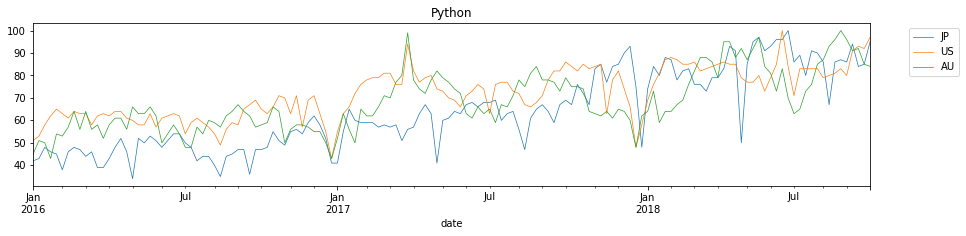

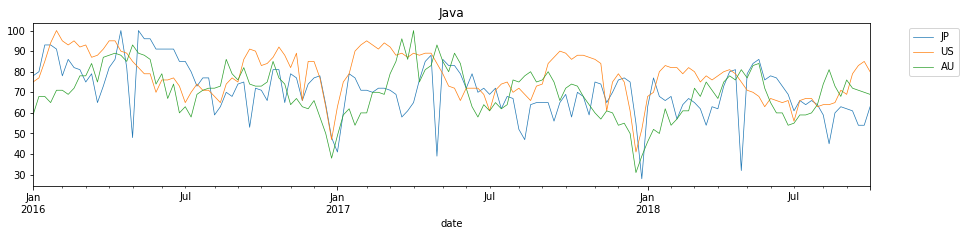

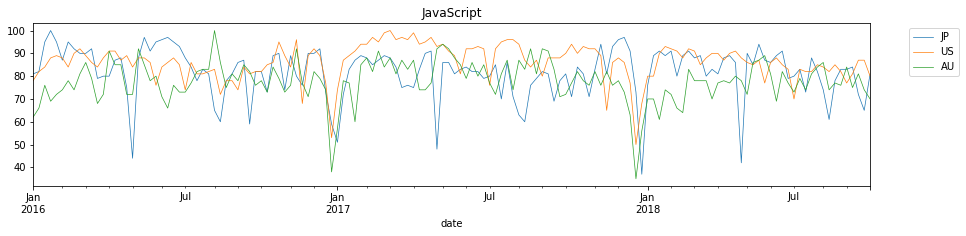

In [8]:
Python.plot(figsize=(15, 3), lw=.7)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Python')   

Java.plot(figsize=(15, 3), lw=.7)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Java')   
JavaScript.plot(figsize=(15, 3), lw=.7)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('JavaScript')   
      
    

In [9]:
Python_trend=pd.DataFrame()
for i in countries:
    res=sm.tsa.seasonal_decompose(Python[i])
    Python_trend=pd.concat([Python_trend,res.trend],axis=1)
Python_trend.columns=countries
JavaScript_trend=pd.DataFrame()
for i in countries:
    res=sm.tsa.seasonal_decompose(JavaScript[i])
    JavaScript_trend=pd.concat([JavaScript_trend,res.trend],axis=1)
JavaScript_trend.columns=countries
Java_trend=pd.DataFrame()
for i in countries:
    res=sm.tsa.seasonal_decompose(Java[i])
    Java_trend=pd.concat([Java_trend,res.trend],axis=1)
Java_trend.columns=countries


Text(0.5, 1.0, 'Java')

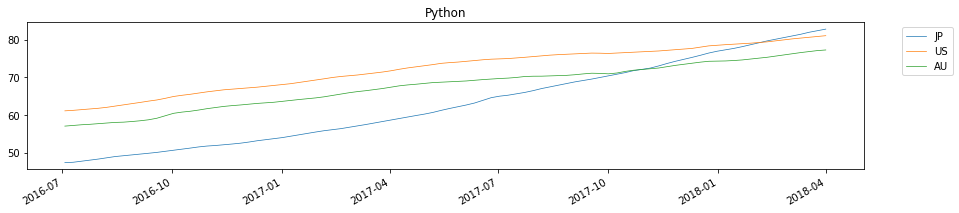

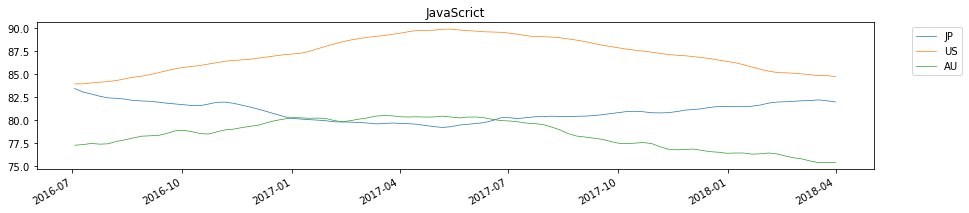

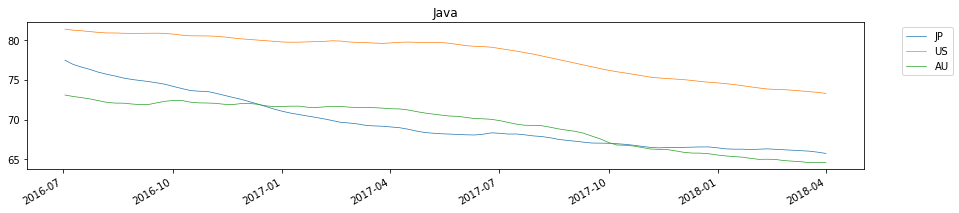

In [10]:
Python_trend.plot(figsize=(15,3),lw=.7)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Python')
JavaScript_trend.plot(figsize=(15,3),lw=.7)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('JavaScrict')
Java_trend.plot(figsize=(15,3),lw=.7)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Java')